# 计算智能练习2

**运行环境：**

In [54]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

np.set_printoptions(edgeitems=2)

## 1. 数据

文件夹orl中包含40个人的人脸图像，每个人有10幅图像，共400幅图像。

### 1.1 数据读取

样本个数：400
样本示例：
 [[ 48  49 ...  46  46]
 [ 60  60 ...  34  34]
 ...
 [119 120 ...  94  85]
 [125 124 ...  35  34]]
数据集大小：  (400, 10304)
随机抽取30张人脸显示： 


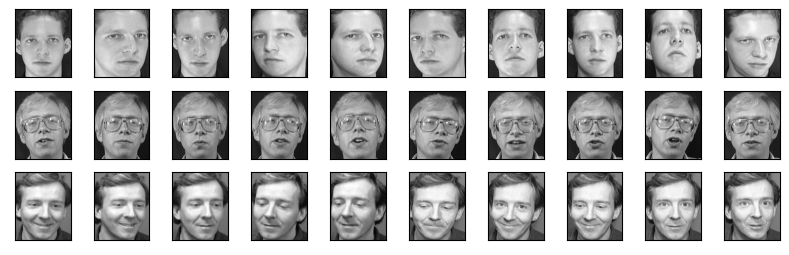

In [203]:
img_data_path = "./data-ORL/ORL/"
img_names = os.listdir(img_data_path)
img_names.sort()
img_names.remove("Thumbs.db")
imgs = [img_data_path + img_name for img_name in img_names]
#print(imgs)

img_array_list = []
for img in imgs:
    im = Image.open(img)
    img_array = np.array(im).flatten()
    img_array_list.append(img_array)
#print(img_array_list)

img_dataset = np.asarray(img_array_list)

print("样本个数：%d" %len(img_dataset))
print("样本示例：\n", img_dataset)
print("数据集大小： ", img_dataset.shape)
print("随机抽取30张人脸显示： ")
fig, axes = plt.subplots(3, 10,
                        figsize=(10,3),
                        subplot_kw={'xticks':[], 'yticks':[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(img_dataset[i,:].reshape(112, 92), cmap='gray')


### 1.2 数据切分

按照要求将数据集划分为**训练集**和**测试集**，实验要求每个人的前5个人脸为训练集，后5个人脸为测试集。

In [41]:
step = 10 #步长，这里由于每个人包含10张图片，因此步长为10
half_step = step//2 #半步长，每个人的10张图片，前半部分为训练集，后半部分为测试集

train_X = img_dataset[0 : half_step, :]
test_X  = img_dataset[half_step : step, :]
labels  = np.zeros((5,1), dtype=int)

l = 1
for i in range(step, len(img_dataset), step):
    #print("range(%d, %d)" %(i, i+step))
    train_X = np.concatenate([train_X, img_dataset[i : i+half_step, :]], axis=0)
    #print("range(%d, %d)" %(i, i+i+half_step))
    test_X  = np.concatenate([test_X, img_dataset[i+half_step : i+step, :]], axis=0)
    #print("range(%d, %d)" %(i + half_step, i+step))
    #生成测试集标签
    labels = np.concatenate([labels, l*np.ones((5,1), dtype=int)], axis=0)
    l += 1

print("训练集 train_X 大小: ", train_X.shape)
print("测试集 test_X 大小: ", test_X.shape)
print("labels :", labels.shape)

训练集 train_X 大小:  (200, 10304)
测试集 test_X 大小:  (200, 10304)
labels : (200, 1)


## 2. 最小距离分类器



### 2.1 计算特征中心

这里每一维度的量纲相同，因此无需进行归一化

In [42]:
mu_list = []
for i in range(0, len(train_X), 5):
    #print("range(%d, %d)" %(i, i+5))
    smaple = train_X[i:i+5, :]
    mu_i = np.mean(smaple, axis=0)
    mu_list.append(mu_i)

#各类中心
mu_centers = np.asarray(mu_list)
print(mu_centers)
print(mu_centers.shape)

[[ 54.8  56.4  55.  ...  36.8  30.6  34.4]
 [ 34.2  35.2  35.6 ...  50.6  51.   51.4]
 [102.  103.2 105.2 ...  43.6  42.2  42.4]
 ...
 [106.2 109.4 109.  ...  66.6  63.6  62. ]
 [ 78.6  80.8  79.4 ... 124.2 121.8 122. ]
 [127.  125.  125.8 ...  67.4  68.8  68. ]]
(40, 10304)


### 2.2 最小距离分类

计算每个样本到各个特征中心的欧氏距离

In [140]:
labels_ = np.zeros((200, 1), dtype=int)
for i in range(len(test_X)):
    #计算到每一类中心的距离
    distances = np.sum((mu_centers - test_X[i,:])**2, axis=1)

    #分类到距离最小的类中心
    labels_[i] = np.argmin(distances)

分类并统计结果

In [50]:
result_dict = dict(已知类号=labels.flatten(),识别结果=labels_.flatten())
result_df = pd.DataFrame(result_dict)
pd.set_option('display.max_rows', 500)
result_df.index.name = '样本编号'
result_df.loc[result_df['已知类号'] != result_df['识别结果'], '结果'] = 'error'
result_df.loc[result_df['已知类号'] == result_df['识别结果'], '结果'] = ''
result_df

,已知类号,识别结果,结果
样本编号,,,
0,0,0,
1,0,0,
2,0,0,
3,0,0,
4,0,0,
5,1,1,
6,1,1,
7,1,1,
8,1,1,


In [53]:
errorno = np.count_nonzero(labels - labels_)
print("识别错误率： %f" %(errorno/len(labels)))

识别错误率： 0.150000


## 3. PCA

### 3.1 算法流程

1. 创建所有训练样本组成的矩阵，并计算训练样本的平均值矩阵
2. 去除平均值，得到规格化后的训练样本矩阵
3. 计算协方差矩阵及其特征值和特征向量，并对特征值排序，保留k个最大的特征值对应的特征向量
4. 获得训练样本的特征脸空间，并计算训练样本在特征脸空间上的投影
5. 计算欧式距离，找出匹配的人量

### 3.2 实现

In [56]:
####### (1) 数据中心化   #######
img_mean = np.mean(img_dataset, axis=0)
img_dataset_center = img_dataset - img_mean

####### (2) 求协方差矩阵 #######
cov_mat = np.cov(img_dataset_center, rowvar=0)
print("协方差矩阵：", cov_mat.shape)
print(cov_mat)

####### (3) 特征值分解  #######
#cov_mat = cov_mat.astype(np.float16)
eigVals, eigVects = np.linalg.eig(cov_mat)

print("特征值: \n", eigVals)
print("特征向量: \n", eigVects)

协方差矩阵： (10304, 10304)
[[1283.65031955 1271.88059524 ... -112.43522556  -58.93531955]
 [1271.88059524 1276.58044486 ... -110.82660401  -58.63296366]
 ...
 [-112.43522556 -110.82660401 ... 1978.60328321 1841.77765664]
 [ -58.93531955  -58.63296366 ... 1841.77765664 1937.10350251]]
特征值: 
 [2.82391006e+06+0.00000000e+00j 2.06973946e+06+0.00000000e+00j ...
 3.56479873e-14+2.79997997e-14j 3.56479873e-14-2.79997997e-14j]
特征向量: 
 [[-2.12507923e-03+0.00000000e+00j  1.46851506e-02+0.00000000e+00j ...
   1.77985538e-04+2.82110395e-04j  1.77985538e-04-2.82110395e-04j]
 [-2.11276614e-03+0.00000000e+00j  1.46139383e-02+0.00000000e+00j ...
   1.73740520e-05+4.22082625e-05j  1.73740520e-05-4.22082625e-05j]
 ...
 [-6.39096175e-03+0.00000000e+00j -9.70069545e-03+0.00000000e+00j ...
  -5.48286160e-03-7.26738461e-03j -5.48286160e-03+7.26738461e-03j]
 [-7.34479428e-03+0.00000000e+00j -8.81892481e-03+0.00000000e+00j ...
  -3.40522445e-03-2.32162539e-04j -3.40522445e-03+2.32162539e-04j]]


In [62]:
####### (4) 特征值排序 #######
#选取前1000个特征值
top = 1000
ranked_eigval_indice = np.argsort(eigVals)
topk_eigval_idx = ranked_eigval_indice[-1:-(top+1):-1]
topk_eigvecs = eigVects[:, topk_eigval_idx]
print(topk_eigvecs.shape)

####### (5) 降维 #######
img_dataset_reduced = np.matmul(img_dataset_center, topk_eigvecs)
print("降维之后的数据：")
print(img_dataset_reduced.shape)
print(img_dataset_reduced)

(10304, 1000)
降维之后的数据：
(400, 1000)
[[ 1.53117605e+03+0.00000000e+00j  1.07218127e+03+0.00000000e+00j ...
  -1.95399252e-14-7.16093851e-15j -3.04201109e-14-4.06341627e-14j]
 [ 2.97589645e+03+0.00000000e+00j  7.59883085e+02+0.00000000e+00j ...
   5.82867088e-15+9.76996262e-15j -6.26165786e-14-1.86517468e-14j]
 ...
 [ 1.40061766e+03+0.00000000e+00j  1.27641047e+03+0.00000000e+00j ...
  -4.20774526e-14-3.10862447e-15j  3.55271368e-15+1.77635684e-15j]
 [ 5.34834654e+02+0.00000000e+00j  4.76892070e+02+0.00000000e+00j ...
  -5.32907052e-15-4.01900735e-14j  6.56141808e-14-5.50670620e-14j]]


### 3.3 可解释性方差及人脸图像重构

下图表示可解释性方差

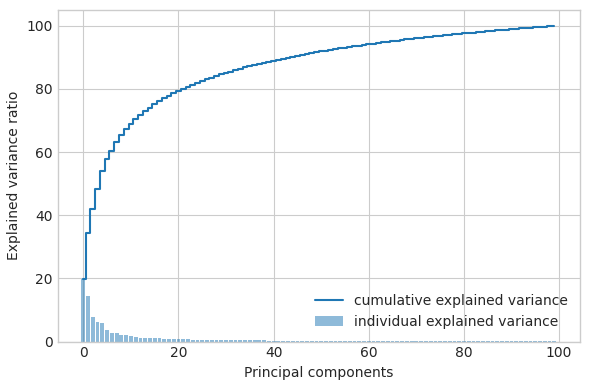

In [146]:
eig_vals = np.abs(eigVals[0:100])
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(eig_vals)), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(eig_vals)), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

从图中可以看出，1个维度的特征保留了20%的原始数据的信息，而20个维度的的特征就几乎保留了80%原始数据的信息，100个维度的特征几乎保留了原始数据100%的信息。

下面展示使用降维到不同维度（1000，100，20，10）后的数据重构原始的人脸数据的直观结果。

一共5行数据，第1，2，3，4，5行分别代表原始数据，降低到1000，100，20，10维之后的数据。


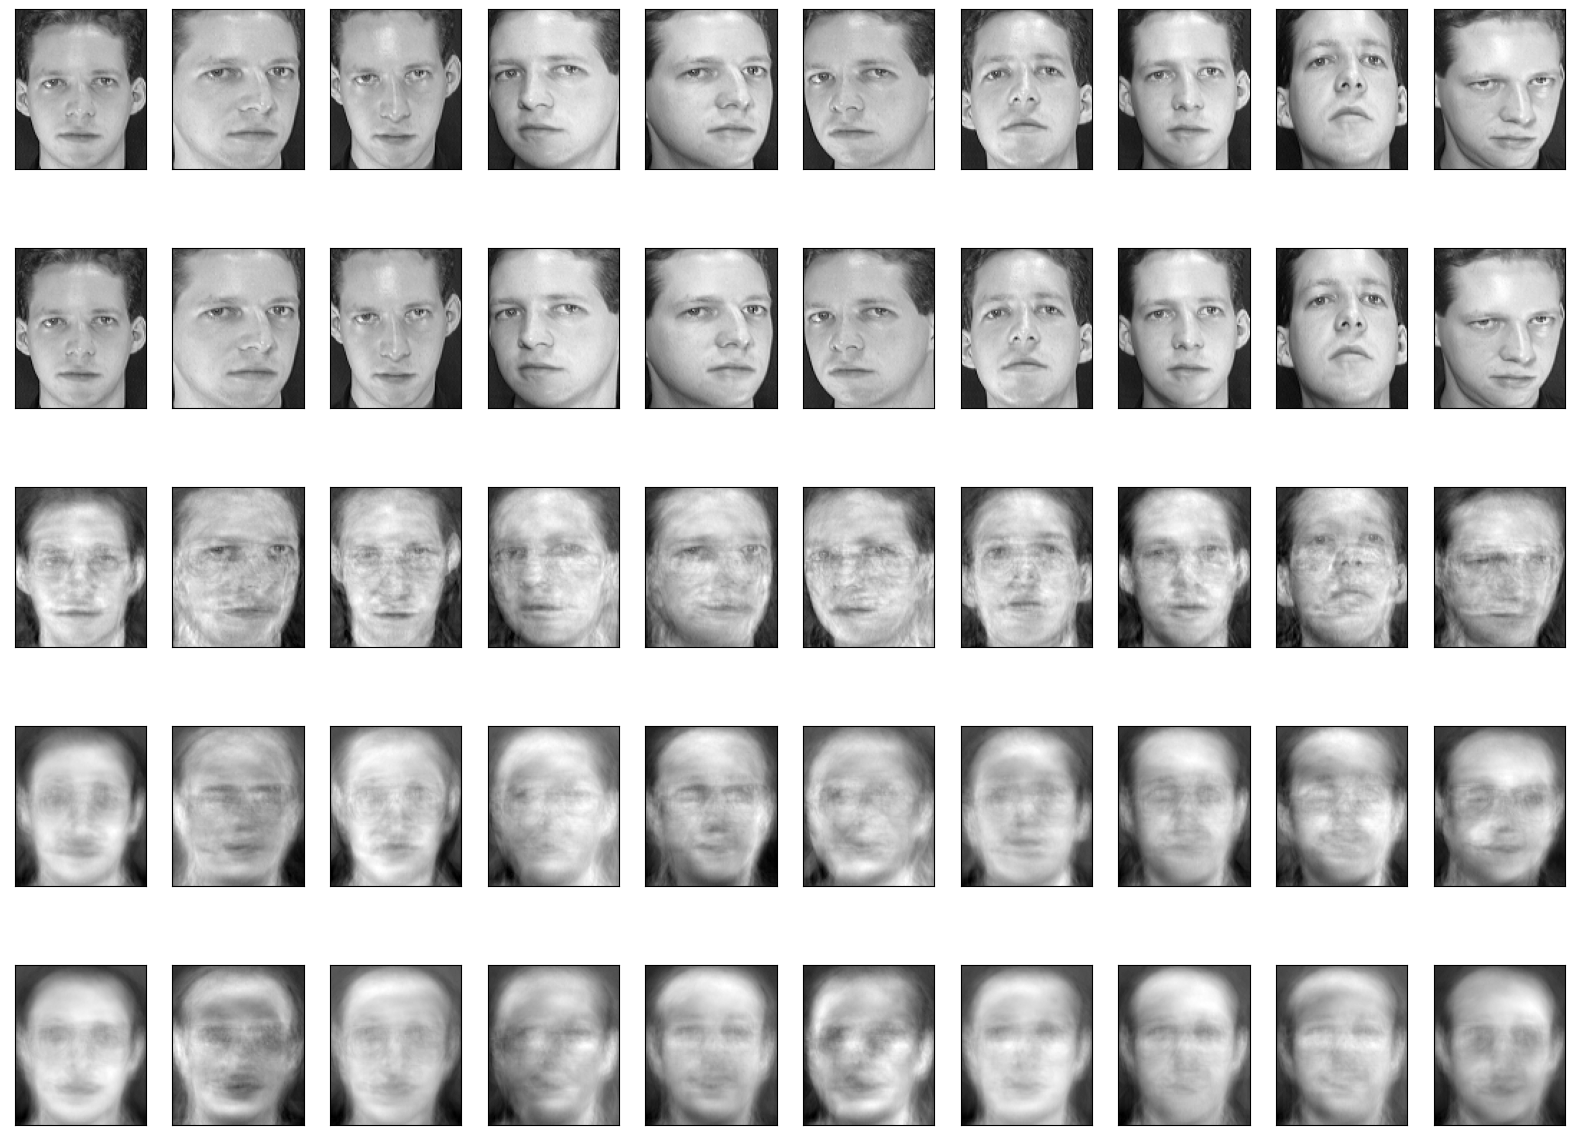

In [148]:
dim_list = [1000, 100, 20, 10]
display_list = []
[display_list.append(img_dataset[i, :].reshape(112, 92)) for i in range(10)]

for d in dim_list:
    n_eigvals_idx = ranked_eigval_indice[-1:-(d+1):-1]
    n_eigvecs = eigVects[:, n_eigvals_idx]

    #数据降维
    low_dim_data = np.matmul(img_dataset_center, n_eigvecs)

    #利用低纬度数据重构数据
    reverse_data = np.matmul(low_dim_data, n_eigvecs.T) + img_mean

    [display_list.append(reverse_data[i, :].reshape(112, 92)) for i in range(10)]

fig, axes = plt.subplots(5, 10,
                        figsize=(20,15),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        sharey=True)

for i,ax in enumerate(axes.flat):
    ax.imshow(np.abs(display_list[i]), cmap='gray')

print("一共5行数据，第1，2，3，4，5行分别代表原始数据，降低到1000，100，20，10维之后的数据。")

## 4. Eigenface + Fisherface (PCA + LDA)

### 4.1 应用Eigenface的方法得到N - C个Eigenfaces

N为训练样本个数，C为类数

In [150]:
N = len(train_X)
C = 40

# 取N-C个Eigenfaces
nc_eigvals_idx = ranked_eigval_indice[-1:-(N-C+1):-1]
eigenfaces = eigVects[:, nc_eigvals_idx]

print("Eigenface", eigenfaces.shape)

200
Eigenface (10304, 160)


### 4.2 将模式投影到Eigenface

将训练样本投影到特征脸空间，得到投影特征 

In [169]:
train_X_prj = np.abs(np.dot(train_X, eigenfaces))
test_X_prj = np.abs(np.dot(test_X, eigenfaces))

print("训练样本投影特征\n", train_X_prj, "\nshape", train_X_prj.shape)
print("测试样本投影特征\n", test_X_prj, "\nshape", test_X_prj.shape)

训练样本投影特征
 [[ 9355.17  7908.76 ...    70.37    17.45]
 [10799.89  7596.46 ...   126.      73.61]
 ...
 [ 8438.14  6815.   ...   261.57    21.37]
 [ 9027.73  8407.22 ...    53.64    56.56]] 
shape (200, 160)
测试样本投影特征
 [[10354.3   7965.89 ...   196.27    63.51]
 [10210.9   7588.08 ...    57.76   162.46]
 ...
 [ 9224.61  8112.99 ...    99.08   177.04]
 [ 8358.83  7313.47 ...    61.98    89.96]] 
shape (200, 160)


### 4.3 FisherFace

1. 计算每类样本中心和总体样本中心
2. 计算类内散度Sw和类间散度Sb


In [171]:
m, n = train_X_prj.shape
total_mu = np.mean(train_X_prj, axis=0)

#计算Sw,Sb
Sw = np.zeros((n, n))
Sb = np.zeros((n, n))
for i in range(0, m, m//C):
    # 取出每一类的样本
    sub_sample = train_X_prj[i:i+5,:]

    # 计算sw
    nor_sub_sample = sub_sample - np.mean(sub_sample, axis=0)
    Sw += np.dot(nor_sub_sample.T, nor_sub_sample)

    # 计算Sb
    normu_sub_sample = sub_sample - total_mu
    Sb += m//C* np.dot(normu_sub_sample.T, normu_sub_sample)

print("类内散度Sw: \n", Sw, "\nShape", Sw.shape)
print("类间散度Sb: \n", Sb, "\nShape", Sb.shape)

类内散度Sw: 
 [[ 4.35e+07  3.97e+06 ... -3.48e+04  4.53e+05]
 [ 3.97e+06  4.45e+07 ... -2.70e+05 -2.91e+05]
 ...
 [-3.48e+04 -2.70e+05 ...  8.35e+05 -9.46e+01]
 [ 4.53e+05 -2.91e+05 ... -9.46e+01  6.49e+05]] 
Shape (160, 160)
类间散度Sb: 
 [[ 3.02e+09 -1.05e+08 ...  8.23e+06  2.24e+07]
 [-1.05e+08  2.01e+09 ... -1.11e+07 -1.26e+07]
 ...
 [ 8.23e+06 -1.11e+07 ...  5.15e+06  2.75e+05]
 [ 2.24e+07 -1.26e+07 ...  2.75e+05  4.35e+06]] 
Shape (160, 160)


应用fisher鉴别准则，得到C-1个鉴别方向，并将特征脸空间中的样本投影到鉴别向量上得到鉴别特征

In [172]:
#计算变换矩阵并进行特征值分解
eignvals, eignvecs = np.linalg.eig(np.mat(np.linalg.inv(Sw)*Sb))
ranked_eignvals = np.argsort(eignvals)

#选取C-1个最大的特征值
top_eignval_idx = ranked_eignvals[-1:-C:-1]
#print(eignvecs.shape)
top_eignvecs = eignvecs[:, top_eignval_idx]
#print(top_eignvecs.shape)

#将测试样本投影到鉴别向量
train_X_prjprj = np.dot(train_X_prj, top_eignvecs)
#print(train_X_prjprj.shape)
test_X_prjprj = np.dot(test_X_prj, top_eignvecs)
#print(test_X_prjprj.shape)

利用将别特征做最小距离分类器

In [173]:
#分类标签
labels_ = np.zeros((m,1), dtype=int)

#最小距离分类
for i in range(m):
    test_sample = test_X_prjprj[i, :]
    distances = np.sum(((train_X_prjprj - test_sample).A)**2, axis=1)
    #distances = np.sum((mu_centers - test_X[i,:])**2, axis=1)
    sorted_distances = np.argsort(distances)
    labels_[i] = (sorted_distances[0]//5)

显示分类结果

In [174]:
result_dict2 = dict(已知类号=labels.flatten(),识别结果=labels_.flatten())
result_df2 = pd.DataFrame(result_dict2)
pd.set_option('display.max_rows', 500)
result_df2.index.name = '样本编号'
result_df2.loc[result_df2['已知类号'] != result_df2['识别结果'], '结果'] = 'error'
result_df2.loc[result_df2['已知类号'] == result_df2['识别结果'], '结果'] = ''
result_df2

,已知类号,识别结果,结果
样本编号,,,
0,0,17,error
1,0,0,
2,0,12,error
3,0,0,
4,0,11,error
5,1,1,
6,1,1,
7,1,1,
8,1,1,


In [175]:
print("分类错误率： %f" %(np.count_nonzero(labels_ - labels)/m))

分类错误率： 0.205000



## 4. An efficient algorithm for Fisher criterion

In [198]:
m, n = train_X.shape
total_mu = np.mean(train_X, axis=0)

#计算Sw,Sb
Sw = np.zeros((n, n))
Sb = np.zeros((n, n))
for i in range(0, m, m//C):
    # 取出每一类的样本
    sub_sample = train_X[i:i+5,:]

    # 计算sw
    nor_sub_sample = sub_sample - np.mean(sub_sample, axis=0)
    Sw += np.dot(nor_sub_sample.T, nor_sub_sample)

    # 计算Sb
    normu_sub_sample = sub_sample - total_mu
    Sb += m//C* np.dot(normu_sub_sample.T, normu_sub_sample)

print("类内散度Sw: \n", Sw, "\nShape", Sw.shape)
print("类间散度Sb: \n", Sb, "\nShape", Sb.shape)

类内散度Sw: 
 [[25607.2 25427.6 ...  8627.   9128.8]
 [25427.6 28204.4 ...  8406.6  8607.4]
 ...
 [ 8627.   8406.6 ... 65225.2 54032.8]
 [ 9128.8  8607.4 ... 54032.8 72297.2]] 
Shape (10304, 10304)
类间散度Sb: 
 [[1241179.9  1228949.7  ... -151239.8   -54572.05]
 [1228949.7  1236349.1  ... -140424.4   -50501.15]
 ...
 [-151239.8  -140424.4  ... 1989179.6  1782404.1 ]
 [ -54572.05  -50501.15 ... 1782404.1  1783972.97]] 
Shape (10304, 10304)


In [191]:
#计算变换矩阵并进行特征值分解
eignvals, eignvecs = np.linalg.eig(np.mat(np.linalg.inv(Sw)*Sb))
ranked_eignvals = np.argsort(eignvals)

In [200]:
#选取C-1个最大的特征值
top_eignval_idx = ranked_eignvals[-1:-N:-1]
#print(eignvecs.shape)
top_eignvecs = eignvecs[:, top_eignval_idx]
#print(top_eignvecs.shape)

#将测试样本投影到鉴别向量
train_X_prj = np.dot(train_X, top_eignvecs)
#print(train_X_prj.shape)
test_X_prj = np.dot(test_X, top_eignvecs)
#print(test_X_prj.shape)

#分类标签
labels_ = np.zeros((m,1), dtype=int)

#最小距离分类
for i in range(m):
    test_sample = test_X_prj[i, :]
    distances = np.sum(((train_X_prj - test_sample).A)**2, axis=1)
    #distances = np.sum((mu_centers - test_X[i,:])**2, axis=1)
    sorted_distances = np.argsort(distances)
    labels_[i] = (sorted_distances[0]//5)

In [201]:
result_dict3 = dict(已知类号=labels.flatten(),识别结果=labels_.flatten())
result_df3 = pd.DataFrame(result_dict3)
pd.set_option('display.max_rows', 500)
result_df3.index.name = '样本编号'
result_df3.loc[result_df3['已知类号'] != result_df3['识别结果'], '结果'] = 'error'
result_df3.loc[result_df3['已知类号'] == result_df3['识别结果'], '结果'] = ''
result_df3

,已知类号,识别结果,结果
样本编号,,,
0,0,26,error
1,0,15,error
2,0,15,error
3,0,15,error
4,0,17,error
5,1,11,error
6,1,26,error
7,1,26,error
8,1,10,error
